# 7/26

### 판다스 내장 그래프 도구
- 판다스는 Matplotlib 라이브러리의 기능을 일부 내장하고 있어서 별도로 임포트하지 않고 간단히 그래프를 그릴 수 있음  
- 선그래프 : df.plot() 메소드 적용시 다른 옵션을 추가하지 않으면 가장 기본적인 선 그래프를 그림.
- 막대 그래프 : df.plot(kind='bar), df.plot(kind='barh', stacked=True, alpha=0.8) / barh 는 수평
- 히스토그램 : df.plot(kind='hist') / 확률변수의 분포!
- 산점도 : df.plot(x='', y='', kind='scatter'), 상관관계를 볼 수 있음. / x,y 값을 점으로 찍음!
- 박스플롯 : df.plot(kind='box'), df.boxplot(column=['feature']) 특정 변수의 데이터 분포와 분산 정도에 대한 정보를 제공 / 이상치를 알 수 있음(IQR X 1.5 밖은 이상치)
  
### matplotlib  
import matplotlib.pyplot as plt
- histogram : plt.hist(x, bins= ) / bins : 몇 개로 나눌지
- line plot : plt.plot(x,y)
- plt.bar(x,y,width= ,color='')
- scatter plot : plt.scatter(x,y):
  
### seaborn
import seaborn as sns
- sns.distplot(data, bins=, color=, kde=), histplot, displot으로 변경
- sns.boxplot(x,y,data,color)
- sns.violinplot(x,y,data,color) 
- sns.barplot(x,y,data,color)
- sns.jointplot(x,y,data,color) / scatter, histo 등 종합
- sns.pairplot(data,hue,palette) / 여러 산점도 동시에 나옴
- sns.lmplot(x,y,data,color) / 회귀
- sns.regplot(x,y,data,fig_reg=False) / 회귀

데이터 분석을 위한 시각화

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('dataset/주가데이터.csv')
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    20 non-null     object
 1   Close   20 non-null     int64 
 2   Start   20 non-null     int64 
 3   High    20 non-null     int64 
 4   Low     20 non-null     int64 
 5   Volume  20 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB


<AxesSubplot:>

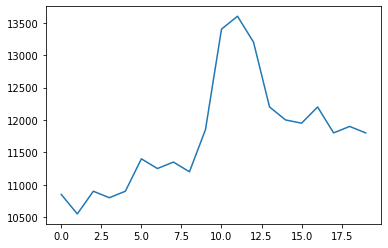

In [4]:
df['Start'].plot(kind='line')

In [2]:
# Q. NDate 칼럼을 datetime 타입으로 생성하고 인덱스로 셋팅하세요.
# 컬럼 선택 : 'Close', 'Start', 'High', 'Low'
df['Ndate'] = pd.to_datetime(df['Date'])
df1 = df.set_index('Ndate')
df1.drop(['Date','Volume'],axis=1, inplace=True)
df1.head()

,Close,Start,High,Low
Ndate,,,,
2018-07-02,10100,10850,10900,10000
2018-06-29,10700,10550,10900,9990
2018-06-28,10400,10900,10950,10150
2018-06-27,10900,10800,11050,10500
2018-06-26,10800,10900,11000,10700


<AxesSubplot:xlabel='Ndate'>

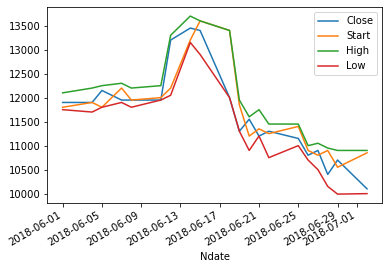

In [4]:
# 선 그래프
df1.plot() ### 아무것도 안하면 선그래프/ 범례 = legend

<AxesSubplot:xlabel='Ndate'>

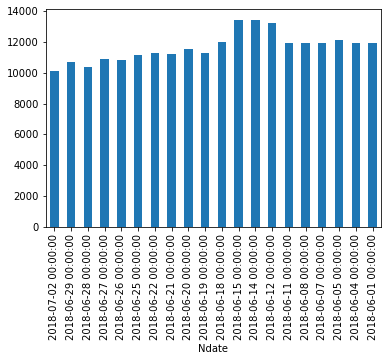

In [6]:
# 막대 그래프
df1['Close'].plot(kind='bar')

<AxesSubplot:xlabel='Ndate'>

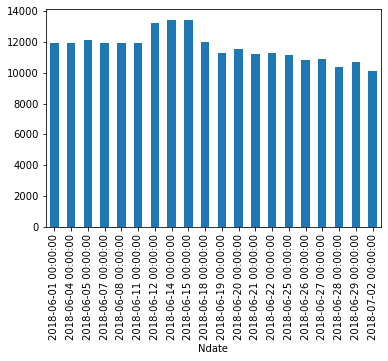

In [8]:
df1.Close[::-1].plot(kind='bar')

<AxesSubplot:xlabel='Ndate'>

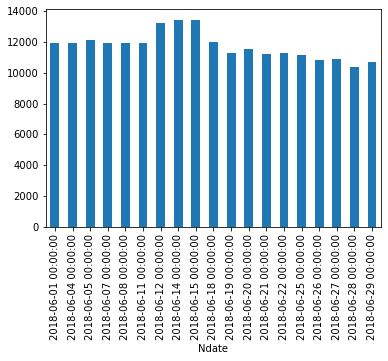

In [9]:
# Q. 6월만을 추출하여 Close 칼럼으로 일별 막대 그래프를 표현하세요.
# df1.Close['2018-06'][::-1].plot(kind='bar')

# df1['2018-6']

df1.loc['2018-6','Close'][::-1].plot(kind='bar')

In [10]:
df1.Close.value_counts()

11950    3
11300    2
11900    2
10400    1
13450    1
10700    1
11150    1
10800    1
12000    1
13200    1
10100    1
12150    1
13400    1
11200    1
10900    1
11550    1
Name: Close, dtype: int64

<AxesSubplot:ylabel='Frequency'>

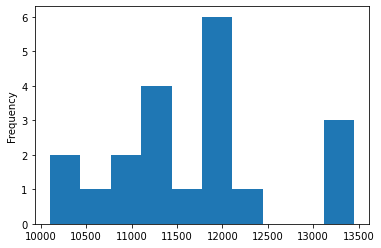

In [11]:
df1.Close.plot(kind='hist', bins=10) ### 분포 보기, bins는 전체 구간을 몇 개로 나눌지

<AxesSubplot:ylabel='Frequency'>

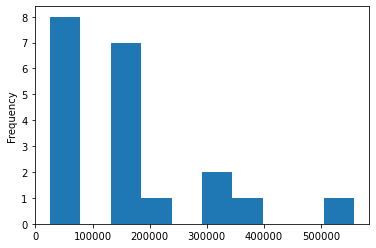

In [12]:
# Q. df에서 Volume 칼럼의 분포를 탐색하는 히스토그램을 표현하세요.
df.Volume.plot(kind='hist')

<AxesSubplot:xlabel='Close', ylabel='Volume'>

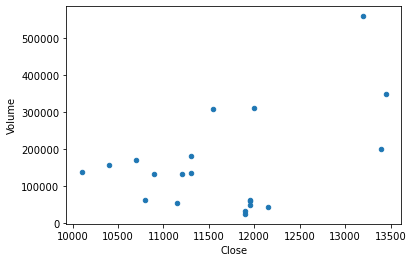

In [13]:
# Q. Close 컬럼과 Volume 칼럼으로 산점도를 표현하세요.
df.plot(x='Close',y='Volume',kind='scatter')

In [14]:
df.corr()

,Close,Start,High,Low,Volume
Close,1.000000,0.856181,0.941201,0.946297,0.441466
Start,0.856181,1.000000,0.961009,0.921467,0.337829
High,0.941201,0.961009,1.000000,0.945487,0.484145
Low,0.946297,0.921467,0.945487,1.000000,0.246323
Volume,0.441466,0.337829,0.484145,0.246323,1.000000


In [15]:
# Q. Close 칼럼의 Box Plot 을 표현하세요.

<AxesSubplot:>

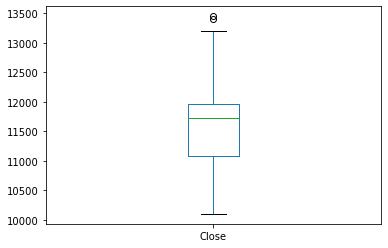

In [16]:
df.Close.plot(kind='box')

Box plot 의미 해석
- 중앙값
- IQR(Inter Quartile Range) : 제 3사분위수 - 제 1사분위수
- lower whisker : Q1 - 1.5 x IQR 이내인 값 중에서 최솟값
- upper whisker : Q3 + 1.5 x IQR 이내인 값 중에서 최댓값
- 이상치 : lower whisker, upper whisker를 벗어나는 값

In [17]:
# Q. Close 칼럼의 이상치를 구하세요.

In [18]:
df.Close.describe()

count       20.000000
mean     11662.500000
std        927.060294
min      10100.000000
25%      11087.500000
50%      11725.000000
75%      11962.500000
max      13450.000000
Name: Close, dtype: float64

In [19]:
Q1 = df.Close.describe()['25%']
Q3 = df.Close.describe()['75%']
IQR = Q3 - Q1
outlier = df[(df['Close']<=(Q1-IQR*1.5))|((Q3+IQR*1.5)<=df['Close'])]
outlier
# IQR*1.5 범위 이내에서의 최솟값과 최대값이 LW, UW가 됨.
# 그 범위를 벗어나면 이상치

,Date,Close,Start,High,Low,Volume,Ndate
11,2018-06-15,13400,13600,13600,12900,201376,2018-06-15
12,2018-06-14,13450,13200,13700,13150,347451,2018-06-14


In [20]:
Q1 = df.Close.describe()['25%']
Q3 = df.Close.describe()['75%']
IQR = Q3 - Q1

LW = df[df['Close']>Q1 - IQR*1.5]['Close'].min()
UW = df[Q3 + IQR*1.5>df['Close']]['Close'].max()

outlier = df[(df['Close']>UW)|(df['Close']<LW)]
outlier

,Date,Close,Start,High,Low,Volume,Ndate
11,2018-06-15,13400,13600,13600,12900,201376,2018-06-15
12,2018-06-14,13450,13200,13700,13150,347451,2018-06-14


In [21]:
# 선생님
iqr = 11962.500000 - 11087.500000
uw_check = 11962.500000 + iqr*1.5
print(uw_check, '\n')
c = df.Close.sort_values(ascending=False)
print(c[:5],'\n')
df.Close[df.Close >= uw_check]

13275.0 

12    13450
11    13400
13    13200
17    12150
10    12000
Name: Close, dtype: int64 



11    13400
12    13450
Name: Close, dtype: int64

In [22]:
# 과제
# Q. Start 칼럼의 분포 및 이상치 여부를 탐색하는 Box Plot 및 이상치를 구하세요

<AxesSubplot:>

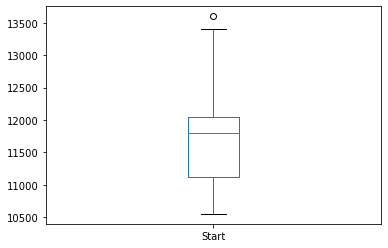

In [7]:
df.Start.plot(kind='box')

In [22]:
Q1 = df.Start.describe()['25%']
Q3 = df.Start.describe()['75%']
IQR = Q3-Q1
LW = df[df['Start'] >= Q1-IQR*1.5]['Start'].min()
UW = df[df['Start'] <= Q3+IQR*1.5]['Start'].max()
outlier = df[(df['Start']>UW)|(df['Start']<LW)]['Start']
outlier

11    13600
Name: Start, dtype: int64

In [24]:
Q1 = df.Start.describe()['25%']
Q3 = df.Start.describe()['75%']
IQR = Q3 - Q1

LW = df[df['Start']>Q1 - IQR*1.5]['Start'].min()
UW = df[Q3 + IQR*1.5>df['Start']]['Start'].max()

outlier = df[(df['Start']>UW)|(df['Start']<LW)]
outlier

,Date,Close,Start,High,Low,Volume,Ndate
11,2018-06-15,13400,13600,13600,12900,201376,2018-06-15


In [23]:
df_ep = pd.read_excel('dataset/df_ep.xlsx')
df_ep.head()

,year,south,north
0,1990,1077,277
1,1991,1186,263
2,1992,1310,247
3,1993,1444,221
4,1994,1650,231


<AxesSubplot:xlabel='year'>

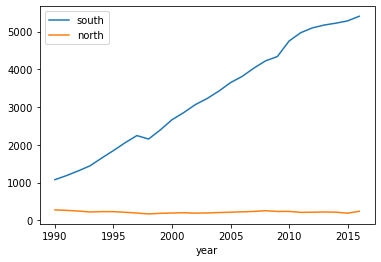

In [24]:
df_ep.set_index('year', inplace=True)
df_ep.plot()

<AxesSubplot:xlabel='year'>

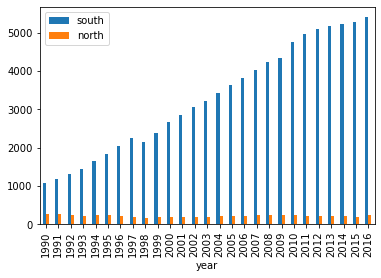

In [27]:
df_ep.plot(kind='bar')

<AxesSubplot:xlabel='year'>

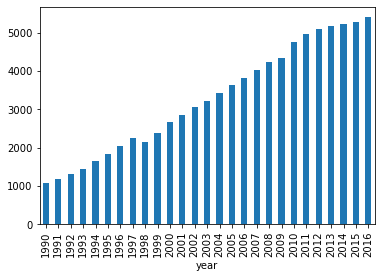

In [44]:
df_ep['south'].plot(kind='bar')

<AxesSubplot:xlabel='year'>

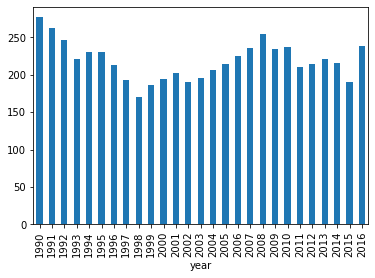

In [45]:
df_ep['north'].plot(kind='bar')

<AxesSubplot:ylabel='year'>

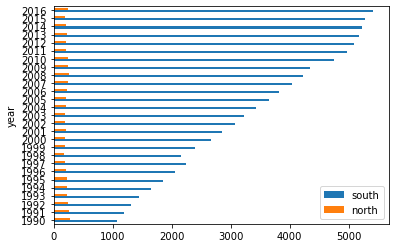

In [28]:
df_ep.plot(kind='barh')

<AxesSubplot:ylabel='Frequency'>

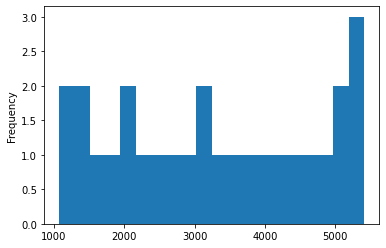

In [43]:
df_ep['south'].plot(kind='hist', bins=20)

<AxesSubplot:ylabel='Frequency'>

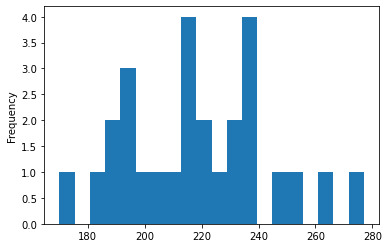

In [42]:
df_ep['north'].plot(kind='hist', bins=20)

<AxesSubplot:>

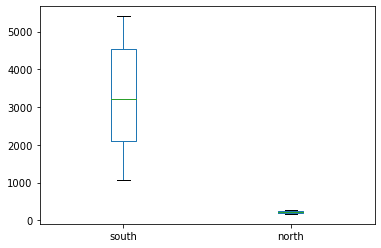

In [30]:
df_ep.plot(kind='box')

<AxesSubplot:>

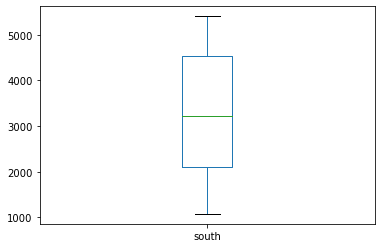

In [34]:
df_ep['south'].plot(kind='box')

<AxesSubplot:>

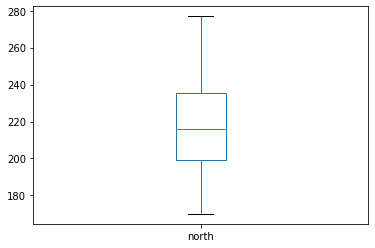

In [35]:
df_ep['north'].plot(kind='box')

# 7/27

In [27]:
import pandas as pd
import numpy as np

fish_multi = pd.read_csv('dataset/4_fm2.csv')
fish_multi.head()

,species,length
0,A,2
1,A,3
2,A,3
3,A,4
4,A,4


<AxesSubplot:xlabel='species', ylabel='length'>

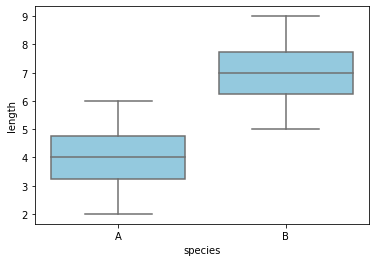

In [28]:
# fish_multi.groupby('species').plot(kind='box')

import seaborn as sns
sns.boxplot(x='species', y='length', data=fish_multi, color='skyblue') # 따로 만들기 / color옵션 없으면 색 다르게 나옴

In [64]:
# sns.boxplot(x='species', y='length', data=fish_multi, palette=('skyblue','yellow')) #색 옵션 따로 설정

In [29]:
fish_multi.groupby('species').describe()

length                                          
         count mean       std  min   25%  50%   75%  max
species                                                 
A         10.0  4.0  1.154701  2.0  3.25  4.0  4.75  6.0
B         10.0  7.0  1.154701  5.0  6.25  7.0  7.75  9.0

In [30]:
fish_multi.iloc[5,1] = 10
fish_multi.iloc [10,1] =  2
fish_multi.groupby('species').describe()

length                                           
         count mean       std  min   25%  50%   75%   max
species                                                  
A         10.0  4.6  2.221111  2.0  3.25  4.0  5.00  10.0
B         10.0  6.7  1.888562  2.0  6.25  7.0  7.75   9.0

In [36]:
# 과제
# Q. A,B 그룹의 Box Plot을 그리고 이상치를 구하세요.

<AxesSubplot:xlabel='species', ylabel='length'>

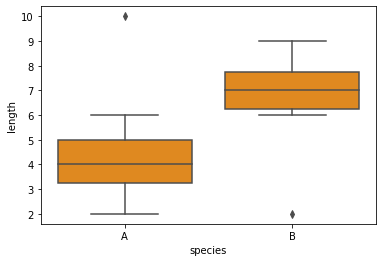

In [31]:
# Box Plot 그리기
import seaborn as sns
sns.set_palette('pastel')
sns.boxplot(x='species',y='length', data=fish_multi, color='darkorange')

In [32]:
# 이상치 구하기

# A 이상치
fish_s = fish_multi.groupby('species')
A_df = fish_s.get_group('A')
A = fish_s.describe().iloc[0]['length']
A_Q1 = A['25%']
A_Q3 = A['75%']
A_IQR = A_Q3 - A_Q1
A_UW = A_df[A_df['length'] <= A_Q3 + A_IQR*1.5]['length'].max()
A_LW = A_df[A_df['length'] >= A_Q1 - A_IQR*1.5]['length'].min()
A_outlier = A_df[(A_df['length'] > A_UW) | (A_df['length'] < A_LW)]
if len(A_outlier)==0:
    print('A : 이상치 없음')
else:
    print(A_outlier)

# B 이상치
B_df = fish_s.get_group('B')
B = fish_s.describe().iloc[1]['length']
B_Q1 = B['25%']
B_Q3 = B['75%']
B_IQR = B_Q3 - B_Q1
B_UW = B_df[B_df['length'] <= B_Q3 + B_IQR*1.5]['length'].max()
B_LW = B_df[B_df['length'] >= B_Q1 - B_IQR*1.5]['length'].min()
B_outlier = B_df[(B_df['length'] > B_UW) | (B_df['length'] < B_LW)]
if len(B_outlier)==0:
    print('B : 이상치 없음')
else:
    print(B_outlier)

  species  length
5       A      10
   species  length
10       B       2


In [77]:
# Q. 1000사이의 균일분포를 이루는 난수 생성
data = np.random.rand(10000)*1000 # rand는 0.0~1.0 사이의 균일분포(실수) -> 1000 곱해줌. 0.0~ 1000.0
data[:10]
df = pd.DataFrame(data, columns = ['Num'])
print(df.head())
df.describe()

          Num
0  671.942680
1  762.826416
2  412.998273
3  722.246973
4  337.914566


,Num
count,10000.000000
mean,498.505749
std,286.570566
min,0.056960
25%,252.525420
50%,495.124532
75%,747.068678
max,999.761807


<AxesSubplot:ylabel='Frequency'>

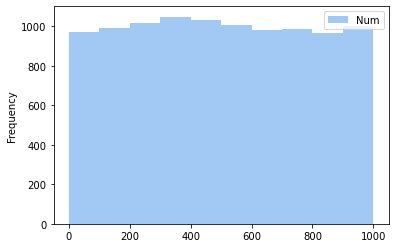

In [80]:
df.plot(kind='hist')

                Num
count  10000.000000
mean       0.009435
std        1.001239
min       -3.451403
25%       -0.672294
50%        0.018803
75%        0.688683
max        4.168118
        Num
0 -0.122474
1  0.228170
2 -0.352305
3 -0.830553
4 -0.261090


<AxesSubplot:ylabel='Frequency'>

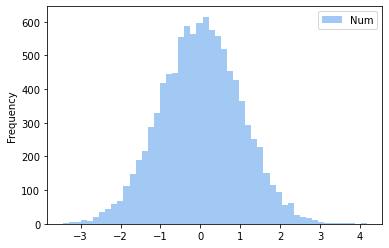

In [103]:
# Q. 평균 0, 표준편차 1인 표준정규분포 난수 10000개 데이터프레임 생성,
# 통계요약표 및 시각화를 (컬럼명 'Num')
data1 = np.random.randn(10000)
df1 = pd.DataFrame(data1, columns=['Num'])
print(df1.describe())
print(df1.head())
df1.plot(kind='hist', bins=50)

         Num
0  13.248691
1   8.776487
2   8.943656
3   7.854063
4  11.730815
                Num
count  10000.000000
mean      10.019545
std        1.997672
min        2.687120
25%        8.674150
50%       10.016908
75%       11.343618
max       18.053698


<AxesSubplot:ylabel='Frequency'>

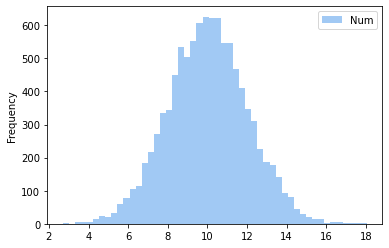

In [96]:
from scipy import stats
np.random.seed(1)
sample1 = stats.norm.rvs(loc=10,scale=2,size=10000) # loc:평균 10 / scale:표준편차 2 / 샘플 10000개
df1 = pd.DataFrame(sample1, columns=['Num'])
print(df1.head())
print(df1.describe())
df1.plot(kind='hist', bins=50)

<AxesSubplot:>

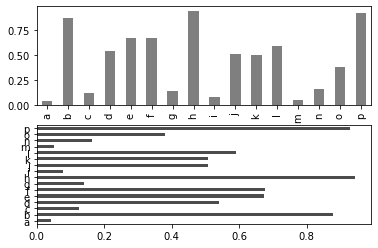

In [2]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(2,1) # 2행 1열
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0],color='k',alpha=0.5) # alpha 투명도 / color k 블랙
data.plot.barh(ax=axes[1],color='k',alpha=0.7)

<AxesSubplot:>

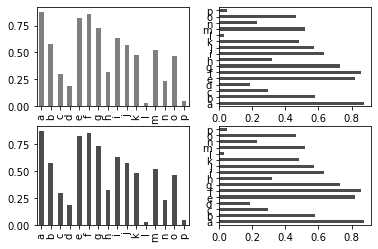

In [88]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(2,2) # 그래프를 2행 2열
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0,0],color='k',alpha=0.5) # alpha 투명도 / color k 블랙
data.plot.barh(ax=axes[0,1],color='k',alpha=0.7)
data.plot.bar(ax=axes[1,0],color='k',alpha=0.7)
data.plot.barh(ax=axes[1,1],color='k',alpha=0.7)

In [105]:
df = pd.DataFrame(np.random.rand(6,4),
                 index = ['one','two','three','four','five','six'],
                 columns = ['A','B','C','D'])
print(df)

              A         B         C         D
one    0.014888  0.951948  0.736155  0.000311
two    0.161438  0.103647  0.039424  0.408380
three  0.902127  0.178761  0.958175  0.832635
four   0.529371  0.503711  0.489320  0.906172
five   0.752909  0.463238  0.789614  0.323568
six    0.376184  0.671471  0.659312  0.920530


<AxesSubplot:>

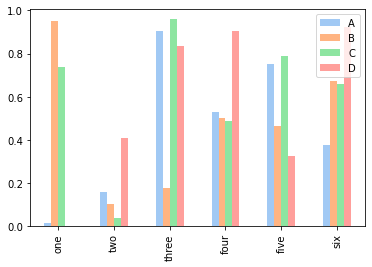

In [106]:
df.plot(kind='bar')

<AxesSubplot:>

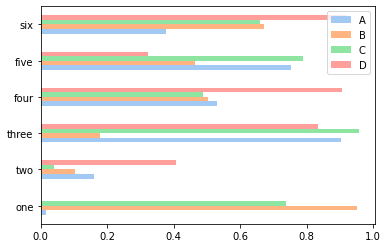

In [107]:
df.plot(kind='barh')

<AxesSubplot:>

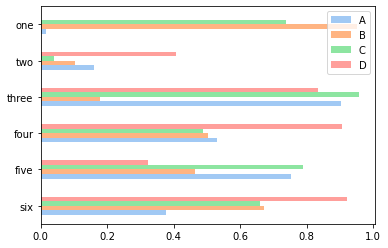

In [108]:
df[::-1].plot(kind = 'barh') # 순서 반대

<AxesSubplot:>

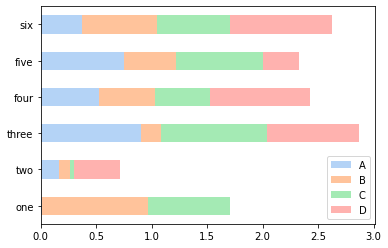

In [109]:
df.plot(kind='barh',stacked=True, alpha=0.8) # stack에 하면 전체를 알 수 있음!

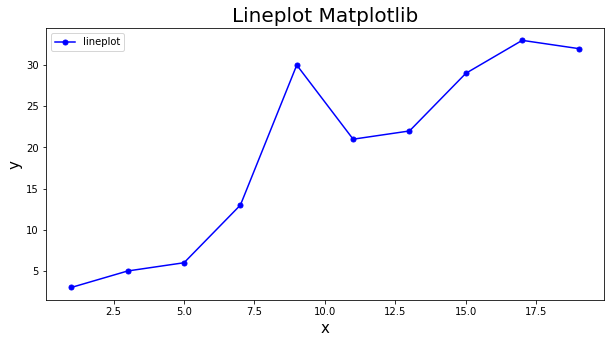

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(1,21,2)
y = np.array([3,5,6,13,30,21,22,29,33,32])
plt.figure(figsize=(10,5)) # figsize 그림사이즈
plt.plot(x,y,color='blue',marker='o',markersize=5)
plt.title('Lineplot Matplotlib', size = 20)
plt.xlabel('x',size=15)
plt.ylabel('y',size=15)
plt.legend(labels=['lineplot']) # legend 범례(라인에 대한 설명)

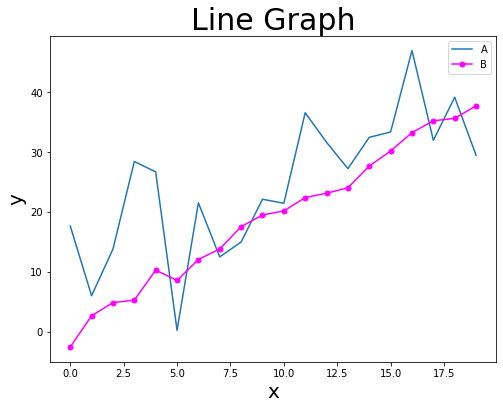

In [14]:
np.random.seed(0)
x = np.arange(20)
# y1 = np.arange(20)*2 # <- 편차 안주면 직선
y1 = np.arange(20)*2 + np.random.randn(20)*10 # <- 편차 더 줌
y2 = np.arange(20)*2 + np.random.randn(20) # <- 편차 줌
plt.figure(figsize=(8,6))
plt.plot(x,y1)
plt.plot(x,y2, color='magenta',marker='o',markersize=5)
plt.xlabel('x',size=20)
plt.ylabel('y',size=20)
plt.title('Line Graph',size=30)
plt.legend(labels=['A','B'])

range(0, 10)
[3 2 2 6 5 5 3 8 7 9]


Text(0.5, 0, 'x')

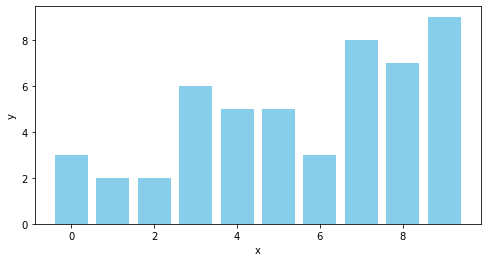

In [30]:
# 막대 그래프
y = np.random.randint(2,10,size=10)
x = range(len(y))
print(x)
print(y)
plt.figure(figsize=(8,4))
plt.bar(x,y,width=0.8,color='skyblue') # width 막대그래프 넓이
plt.ylabel('y')
plt.xlabel('x')

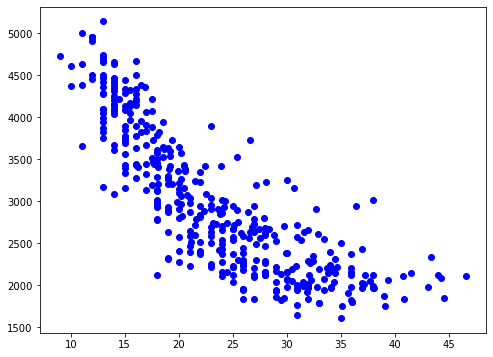

In [32]:
import pandas as pd
# scatter plot
df_auto = pd.read_excel('dataset/auto-mpg.xlsx')
x = df_auto.mpg
y = df_auto.weight
plt.figure(figsize=(8,6))
plt.scatter(x,y,color='blue')

(array([ 3., 10., 40., 38., 36., 37., 30., 31., 21., 33., 24., 24., 20.,
        18., 13.,  9.,  4.,  1.,  5.,  1.]),
 array([ 9.  , 10.88, 12.76, 14.64, 16.52, 18.4 , 20.28, 22.16, 24.04,
        25.92, 27.8 , 29.68, 31.56, 33.44, 35.32, 37.2 , 39.08, 40.96,
        42.84, 44.72, 46.6 ]),
 <BarContainer object of 20 artists>)

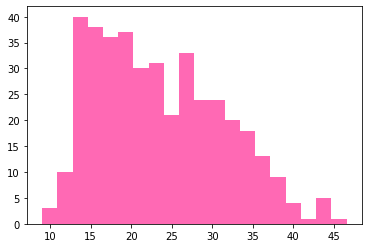

In [33]:
# histogram
plt.hist(df_auto.mpg, bins=20, color='hotpink')

<BarContainer object of 10 artists>

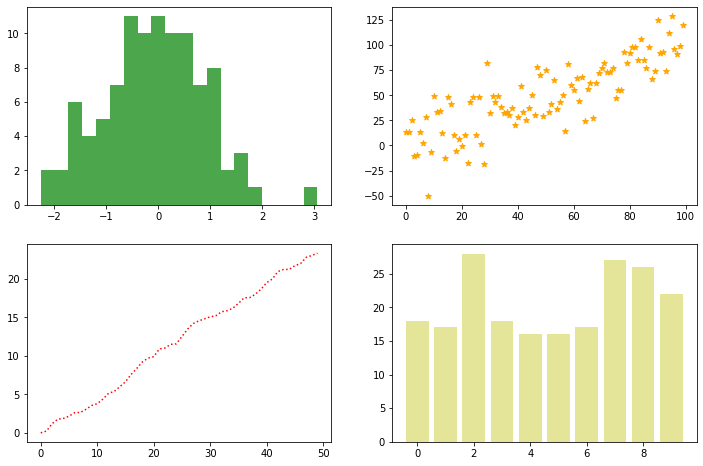

In [36]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(2,2,1) # 2행 2열 중에 첫번 째
ax2 = fig.add_subplot(2,2,2) # 2행 2열 중에 두번 째
ax3 = fig.add_subplot(2,2,3) # 2행 2열 중에 세번 째
ax4 = fig.add_subplot(2,2,4) # 2행 2열 중에 네번 째

ax1.hist(np.random.randn(100), bins=20, color='green', alpha=0.7)
ax2.scatter(x = np.arange(100), y = np.arange(100) + np.random.randn(100)*20, color = 'orange',marker='*')
ax3.plot(np.random.rand(50).cumsum(),'r:')
ax4.bar(np.arange(10),np.random.randint(15,30, 10), color='y',alpha=0.4)

In [53]:
# 과제
# Q. 히스토그램, 선, 막대, 산점도 그래프 4개를 서브플롯으로 출력하세요/

(array([5.00000e+00, 6.00000e+00, 3.20000e+01, 7.10000e+01, 1.99000e+02,
        4.59000e+02, 9.97000e+02, 2.31100e+03, 4.71500e+03, 9.20200e+03,
        1.75570e+04, 3.10890e+04, 5.41480e+04, 8.84920e+04, 1.37362e+05,
        2.03675e+05, 2.87157e+05, 3.88037e+05, 5.00074e+05, 6.13511e+05,
        7.19223e+05, 8.04263e+05, 8.55090e+05, 8.68138e+05, 8.41579e+05,
        7.76439e+05, 6.84664e+05, 5.74253e+05, 4.60055e+05, 3.51338e+05,
        2.56496e+05, 1.78574e+05, 1.18089e+05, 7.42290e+04, 4.45970e+04,
        2.55340e+04, 1.41200e+04, 7.47200e+03, 3.62700e+03, 1.79600e+03,
        7.97000e+02, 3.14000e+02, 1.28000e+02, 5.50000e+01, 2.10000e+01,
        5.00000e+00, 2.00000e+00, 0.00000e+00, 1.00000e+00, 2.00000e+00]),
 array([-5.09072409, -4.87245733, -4.65419058, -4.43592383, -4.21765708,
        -3.99939032, -3.78112357, -3.56285682, -3.34459007, -3.12632331,
        -2.90805656, -2.68978981, -2.47152306, -2.2532563 , -2.03498955,
        -1.8167228 , -1.59845605, -1.38018929, -1

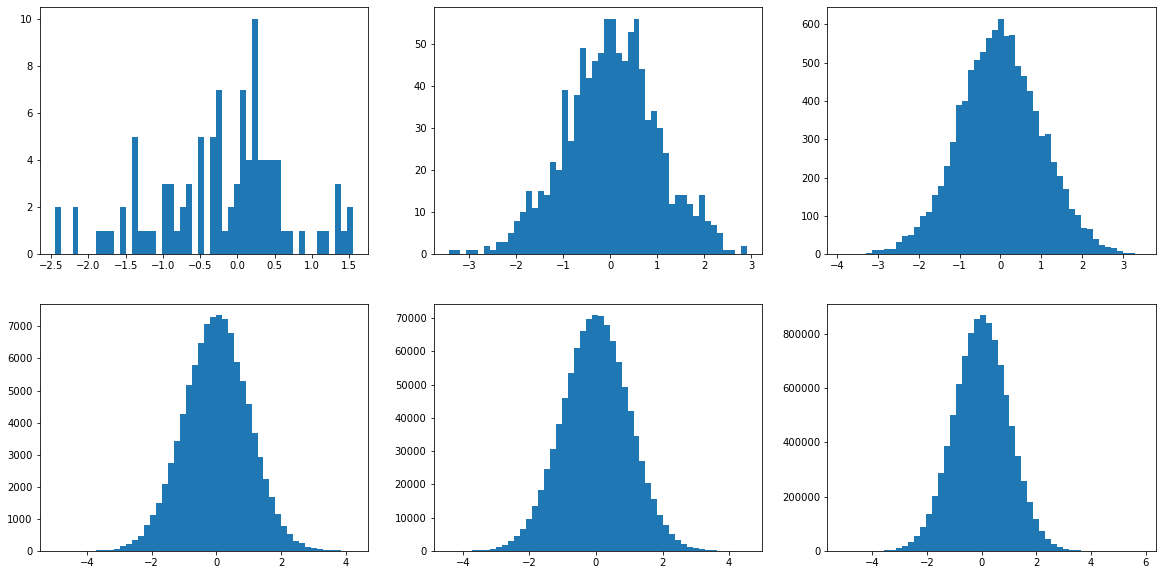

In [41]:
fig,axes = plt.subplots(2,3, figsize=(20,10))
axes[0,0].hist(np.random.randn(100),bins=50)
axes[0,1].hist(np.random.randn(1000),bins=50)
axes[0,2].hist(np.random.randn(10000),bins=50)
axes[1,0].hist(np.random.randn(100000),bins=50)
axes[1,1].hist(np.random.randn(1000000),bins=50)
axes[1,2].hist(np.random.randn(10000000),bins=50)

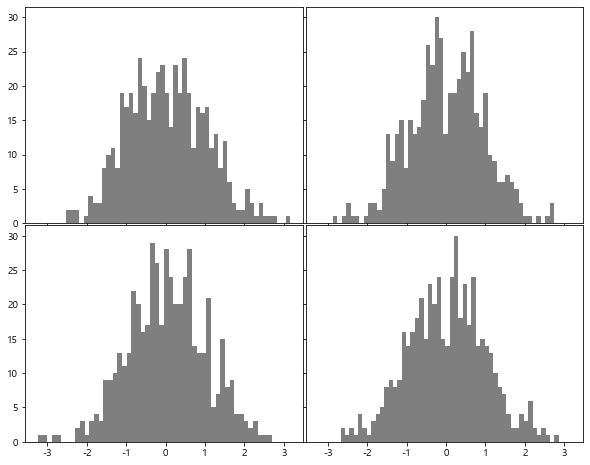

In [55]:
# for문 사용
fig,axes = plt.subplots(2,2,figsize=(10,8), sharex=True, sharey=True) ### x,y share
for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500),bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0.01, hspace=0.01) # 그래프들 사이 간격

[-0.69166075 -1.08841428 -1.77558698 -2.62079262 -3.29203875 -3.30470335
 -4.4220137  -4.187598   -2.52779582 -1.78575166 -1.97758722 -2.86521618
 -3.61237447 -1.91991987 -1.86911212 -2.50610776 -2.31519228 -0.21493714
 -0.09477819  0.52242492  0.82259524  0.47034539 -0.67217281 -1.02151553
 -1.23040976 -0.64378657  0.19519684  1.12629893  1.41188625  2.29702741]


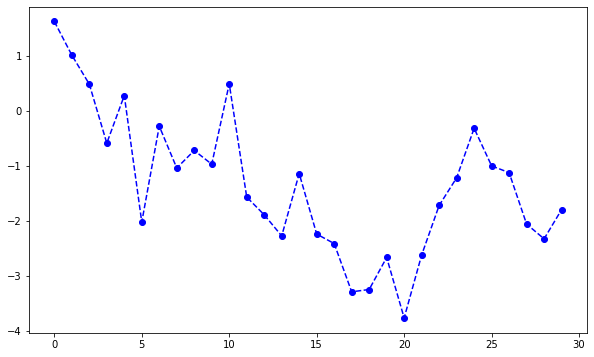

In [43]:
# 색상, 마커, 선 스타일
from numpy.random import randn
np.random.seed(1)
plt.figure(figsize=(10,6))
plt.plot(randn(30).cumsum(), linestyle='dashed', color='b', marker='o') # dashed : 점선
print(randn(30).cumsum()) ### cumsum() 붙이면 누적

In [57]:
plt.style.available # Matplotlib에서 가능한 style들이 나옴

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [44]:
np.random.seed(0)
data = np.random.randn(1000)
cdata = data.cumsum() # 누적
print(data[:10])
cdata[:10]

[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985 ]


array([1.76405235, 2.16420955, 3.14294754, 5.38384074, 7.25139873,
       6.27412085, 7.22420927, 7.07285206, 6.96963321, 7.38023171])

Text(0, 0.5, 'Sum')

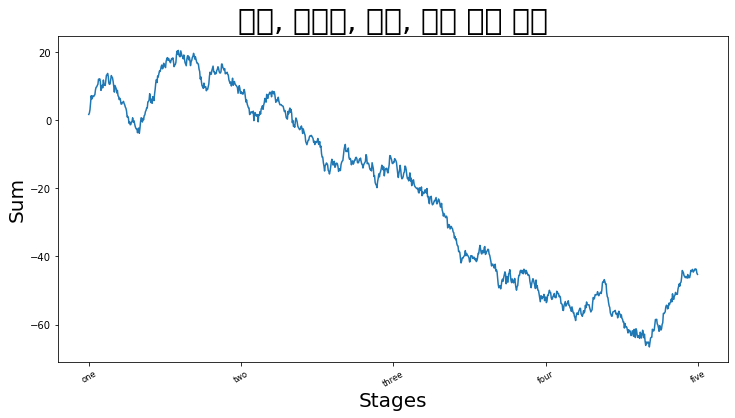

In [49]:
import warnings
warnings.filterwarnings('ignore')
from matplotlib import rc
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)
ax.plot(cdata)
ticks = ax.set_xticks([0,250,500,750,1000])
labels = ax.set_xticklabels(['one','two','three','four','five'],
                           rotation=30, fontsize='small')
ax.set_title('제목, 축이름, 눈금, 눈금 이름 설정',size=30)
ax.set_xlabel('Stages',size=20)
ax.set_ylabel('Sum',size=20)
### 한글 font 문제로 한글 깨짐

Text(0, 0.5, 'Sum')

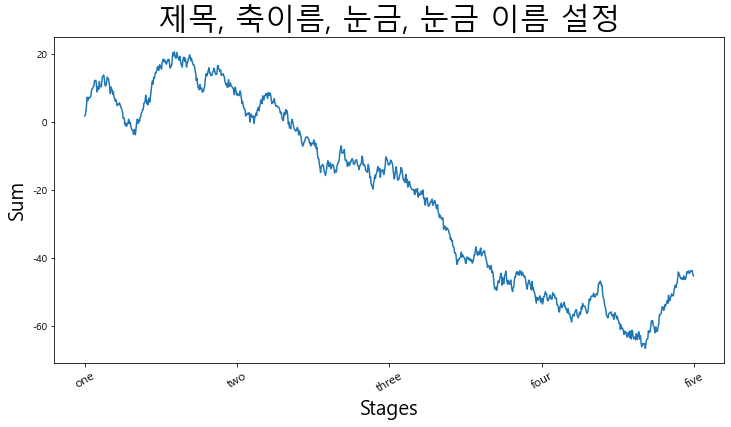

In [56]:
import warnings
warnings.filterwarnings('ignore')
from matplotlib import rc

rc('font',family='Malgun Gothic') # 한글
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)
ax.plot(cdata)
ticks = ax.set_xticks([0,250,500,750,1000])
labels = ax.set_xticklabels(['one','two','three','four','five'],
                           rotation=30, fontsize='large')
ax.set_title('제목, 축이름, 눈금, 눈금 이름 설정',size=30)
ax.set_xlabel('Stages',size=20)
ax.set_ylabel('Sum',size=20)

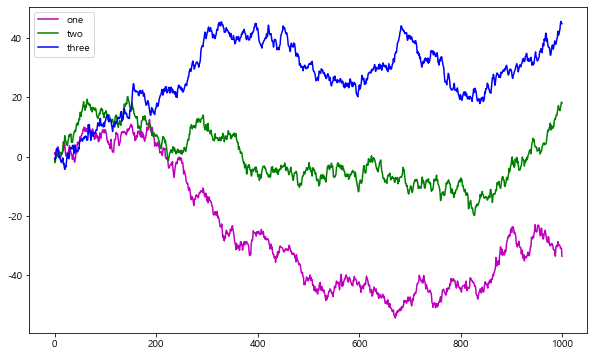

In [60]:
# 범례 추가
from numpy.random import randn
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum(),'m', label='one')
ax.plot(randn(1000).cumsum(),'g', label='two')
ax.plot(randn(1000).cumsum(),'b', label='three')
plt.legend(loc='best') # loc(위치, location), best - 가장 적절한 곳

In [4]:
import seaborn as sns
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
def get_age_cat(age):
    cat = ''
    if age < 15: cat = 'young'
    elif age < 30: cat = 'teen'
    elif age < 45: cat = 'adult'
    elif age < 60: cat = 'mature'
    else: cat = 'elder'
    return cat
df['age_cat'] = df['age'].apply(lambda x : get_age_cat(x))
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_cat
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,teen
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,teen
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,adult


,survived,pclass,age,sibsp,parch,fare,adult_male,alone,Ratio
age_cat,,,,,,,,,
adult,91,457,7667.00,76,83,8532.2664,137,130,215
elder,59,500,1692.50,106,40,5052.2330,146,152,203
mature,36,146,4483.50,30,27,3893.7461,57,53,89
teen,111,749,6908.50,112,87,8742.7579,197,198,306
young,45,205,453.67,142,103,2472.9459,0,4,78


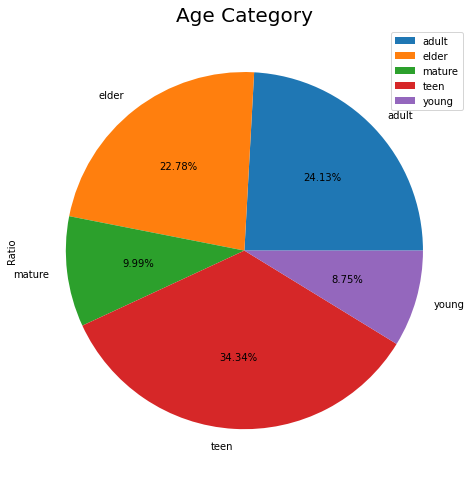

In [8]:
# pie 차트
df['Ratio'] = 1 # 모든 행을 1로 채운 Ratio 컬럼 추가 -> groupby하면 sum 알 수 있음!
df_age_cat = df.groupby('age_cat').sum()
df_age_cat
df_age_cat.Ratio.plot(kind='pie',
                     figsize=(8,10),
                     autopct='%.2f%%', # autopct : autopercent / %까지 표시해주기
                     startangle=0) f
plt.title('Age Category', size=20)
# plt.axis('equal')
plt.legend(labels=df_age_cat.index, loc='best')
df_age_cat

line : 변화를 보기 위한 그래프로 많이 씀. 시간에 따른 변화 (multi_line : 시간에 따라서 두 값을 비교할 수 있음.) / 트렌드

bar : x값 각각의 y값의 변화. stacked으로 누적으로도 볼 수 있음 (한달간의 공부시간양. 전체 총량과 비교 가능.)
      (stacked을 쓰면 여러가지 속성을 한번에 볼 수 있음. (ex: 20210727의 공부시간, 자습시간, 쉬는시간 속성을 비교 확인 가능) / 비교
      
scatter : 두 변수의 관계를 볼 때 많이 씀 / 상관계수

histogram : 도수분포표, 값이나 범위의 '빈도'가 어떤지 확인 할 수 있음. 평균을 기준으로 대칭되는 성질(도수분포표)

boxplot : 이상치 확인할때 많이 씀. 구조가 데이터의 전체를 구조적으로 보여줄 수 있으며, 이상치에 속하는 것들을 눈으로 표시하게 쉽도록 함.

pie : 분포를 확인할 때 씀
